In [43]:
import qiskit 
from qiskit.visualization import plot_histogram,plot_bloch_multivector


# Half Adder

In [27]:
def halfadder(a,b):
    x = qiskit.QuantumRegister(1,'x')
    y = qiskit.QuantumRegister(1,'y')
    sum = qiskit.QuantumRegister(1,'sum')
    carry = qiskit.QuantumRegister(1,'carry')
    
    qc = qiskit.QuantumCircuit(x,y,sum,carry)
    
    if a==1:
        x_in=[0,1]
    else:
        x_in=[1,0]
    if b==1:
        y_in=[0,1]
    else:
        y_in=[1,0]
    qc.initialize(x_in,x)
    qc.initialize(y_in,y)
    qc.ccx(0,1,3)
    qc.cx(0,2)
    qc.cx(1,2)
    return qc
    
    

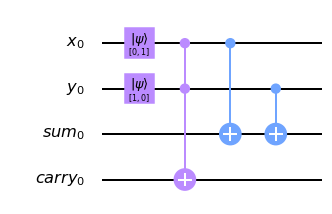

In [30]:
qc_halfAdder = halfadder(1,0)
qc_halfAdder.draw('mpl')

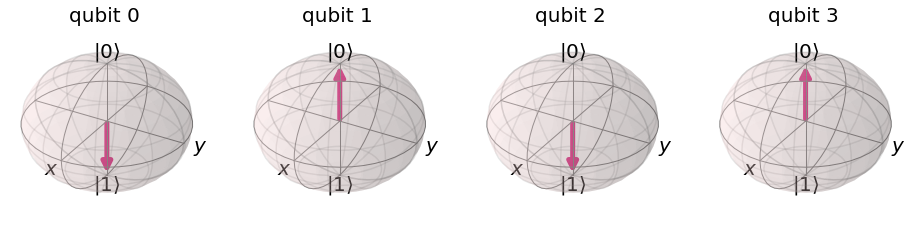

In [31]:
simulator = qiskit.Aer.get_backend('statevector_simulator')
halfAdder_statevector = qiskit.execute(qc_halfAdder,simulator).result().get_statevector()
plot_bloch_multivector(halfAdder_statevector)

# Full Adder

In [40]:
def fulladder(a,b,cin):
    c=qiskit.QuantumRegister(1,'c')
    x = qiskit.QuantumRegister(1,'x')
    y = qiskit.QuantumRegister(1,'y')
    sum = qiskit.QuantumRegister(1,'sum')
    carry = qiskit.QuantumRegister(1,'carry')
    
    qc = qiskit.QuantumCircuit(c,x,y,sum,carry)
    
    if a==1:
        x_in=[0,1]
    else:
        x_in=[1,0]
    if b==1:
        y_in=[0,1]
    else:
        y_in=[1,0]
    if cin==1:
        c_in=[0,1]
    else:
        c_in=[1,0]
    
    qc.initialize(x_in,x)
    qc.initialize(y_in,y)
    qc.initialize(c_in,c)
    qc.ccx(0,1,4)
    qc.ccx(1,2,4)
    qc.ccx(0,2,4)
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    return qc
    
    

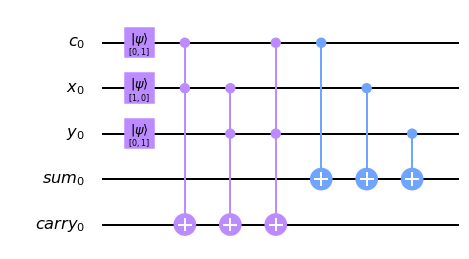

In [41]:
qc_fulladder =fulladder(0,1,1)
qc_fulladder.draw('mpl')

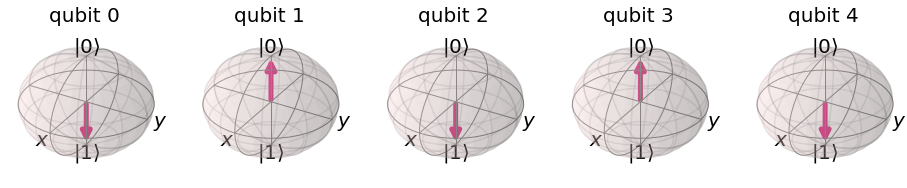

In [42]:
fulladder_statevector = qiskit.execute(qc_fulladder,simulator).result().get_statevector()
plot_bloch_multivector(fulladder_statevector)